<a href="https://colab.research.google.com/github/pinggu95/deep_dive_AI/blob/main/250707study_%EC%84%A0%ED%98%95%EB%B6%84%EB%A5%98_%EB%AA%A8%EB%8D%B8_%EB%A1%9C%EC%A7%80%EC%8A%A4%ED%8B%B1_%ED%9A%8C%EA%B7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
!pip install koreanize-matplotlib
!pip install mglearn

# 선형 분류모델의 결정 경계

In [36]:
import mglearn
import matplotlib.pyplot as plt
import koreanize_matplotlib

from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

import warnings
warnings.filterwarnings('ignore')

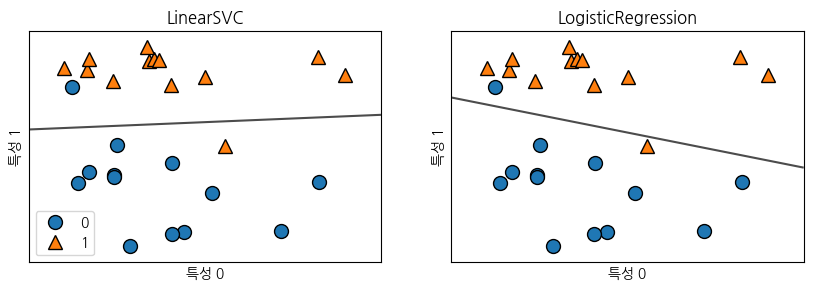

In [37]:
X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize=(10, 3))

for model, ax in zip([LinearSVC(max_iter=5000), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5,
                                    ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title(clf.__class__.__name__)
    ax.set_xlabel("특성 0")
    ax.set_ylabel("특성 1")
axes[0].legend()
plt.show()

## LogisticRegression 규제(L2)에 따른 결정경계 확인

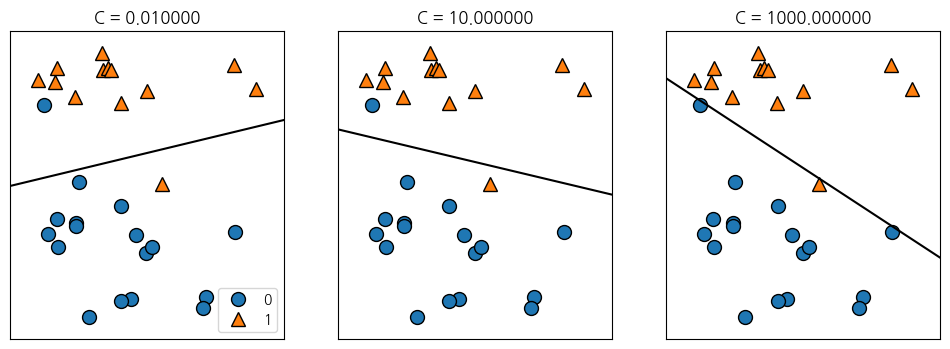

In [38]:
# C=1 규제(공부를 덜 시키겠다 -> 과대적합을 피하겠다) 설정 값
# C 설정 값이 낮으면 ex) 0.01, 0.001 -> 규제 강화 -> 일반화 -> 과소적합
# C 설정 값이 높으면 ex) 10, 100, 1000 -> 규제 완화 -> 과대적합
# 규제하겠다 --> 덜 공부시킨다

mglearn.plots.plot_linear_svc_regularization()

C=1.00
Sparsity with L1 penalty:                4.69%
Sparsity with Elastic-Net penalty:       4.69%
Sparsity with L2 penalty:                4.69%
Score with L1 penalty:                   0.90
Score with Elastic-Net penalty:          0.90
Score with L2 penalty:                   0.90
C=0.10
Sparsity with L1 penalty:                31.25%
Sparsity with Elastic-Net penalty:       10.94%
Sparsity with L2 penalty:                4.69%
Score with L1 penalty:                   0.90
Score with Elastic-Net penalty:          0.90
Score with L2 penalty:                   0.90
C=0.01
Sparsity with L1 penalty:                84.38%
Sparsity with Elastic-Net penalty:       68.75%
Sparsity with L2 penalty:                4.69%
Score with L1 penalty:                   0.86
Score with Elastic-Net penalty:          0.88
Score with L2 penalty:                   0.89


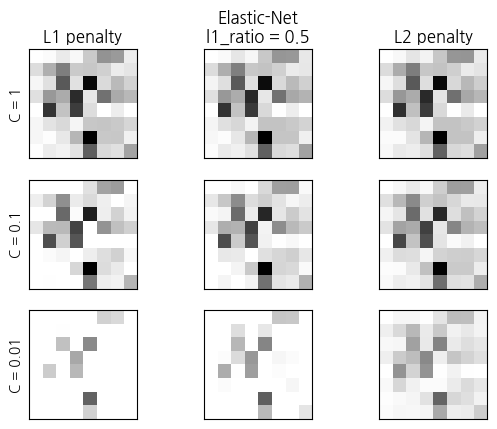

In [39]:
# Authors: The scikit-learn developers
# SPDX-License-Identifier: BSD-3-Clause

import matplotlib.pyplot as plt
import numpy as np

from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

X, y = datasets.load_digits(return_X_y=True)

X = StandardScaler().fit_transform(X)

# classify small against large digits
y = (y > 4).astype(int)

l1_ratio = 0.5  # L1 weight in the Elastic-Net regularization

fig, axes = plt.subplots(3, 3)

# Set regularization parameter
for i, (C, axes_row) in enumerate(zip((1, 0.1, 0.01), axes)):
    # Increase tolerance for short training time
    clf_l1_LR = LogisticRegression(C=C, penalty="l1", tol=0.01, solver="saga")
    clf_l2_LR = LogisticRegression(C=C, penalty="l2", tol=0.01, solver="saga")
    clf_en_LR = LogisticRegression(
        C=C, penalty="elasticnet", solver="saga", l1_ratio=l1_ratio, tol=0.01
    )
    clf_l1_LR.fit(X, y)
    clf_l2_LR.fit(X, y)
    clf_en_LR.fit(X, y)

    coef_l1_LR = clf_l1_LR.coef_.ravel()
    coef_l2_LR = clf_l2_LR.coef_.ravel()
    coef_en_LR = clf_en_LR.coef_.ravel()

    # coef_l1_LR contains zeros due to the
    # L1 sparsity inducing norm

    sparsity_l1_LR = np.mean(coef_l1_LR == 0) * 100
    sparsity_l2_LR = np.mean(coef_l2_LR == 0) * 100
    sparsity_en_LR = np.mean(coef_en_LR == 0) * 100

    print(f"C={C:.2f}")
    print(f"{'Sparsity with L1 penalty:':<40} {sparsity_l1_LR:.2f}%")
    print(f"{'Sparsity with Elastic-Net penalty:':<40} {sparsity_en_LR:.2f}%")
    print(f"{'Sparsity with L2 penalty:':<40} {sparsity_l2_LR:.2f}%")
    print(f"{'Score with L1 penalty:':<40} {clf_l1_LR.score(X, y):.2f}")
    print(f"{'Score with Elastic-Net penalty:':<40} {clf_en_LR.score(X, y):.2f}")
    print(f"{'Score with L2 penalty:':<40} {clf_l2_LR.score(X, y):.2f}")

    if i == 0:
        axes_row[0].set_title("L1 penalty")
        axes_row[1].set_title("Elastic-Net\nl1_ratio = %s" % l1_ratio)
        axes_row[2].set_title("L2 penalty")

    for ax, coefs in zip(axes_row, [coef_l1_LR, coef_en_LR, coef_l2_LR]):
        ax.imshow(
            np.abs(coefs.reshape(8, 8)),
            interpolation="nearest",
            cmap="binary",
            vmax=1,
            vmin=0,
        )
        ax.set_xticks(())
        ax.set_yticks(())

    axes_row[0].set_ylabel(f"C = {C}")

plt.show()

## 유방암 데이터셋을 사용한 로지스틱 회귀 성능 평가

*   규제 강도를 결정한는 C 설정에 따른 성능 비교
*   기본 C = 1, 규제강화 C=0.01, 규제완화 C=100



### 데이터 준비하기

In [40]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

# 데이터 가져오기
cancer = load_breast_cancer()

# 성능 평가를 위한 데이터셋 분리하기
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                    stratify= cancer.target, #비율 보정
                                                    random_state=7)

In [41]:
# 569건 -> 75% -> 426건
X_train.shape

(426, 30)

In [42]:
X_test.shape

(143, 30)

### 모델 설정하기

In [43]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression() # C=1

### 모델 학습하기

In [44]:
logreg.fit(X_train,y_train)

LogisticRegression()

### 모델 성능 평가하기

In [45]:
print('훈련 데이터셋의 R2: ', logreg.score(X_train, y_train))
print('테스트 데이터셋의 R2: ', logreg.score(X_test, y_test))

훈련 데이터셋의 R2:  0.960093896713615
테스트 데이터셋의 R2:  0.9440559440559441


### 기본 C = 1, 규제강화 C=0.01, 규제완화 C=100

In [46]:
logreg = LogisticRegression().fit(X_train,y_train)
print('훈련 데이터셋의 R2: ', logreg.score(X_train, y_train))
print('테스트 데이터셋의 R2: ', logreg.score(X_test, y_test))
print('-----------------------------------------------------------')

# 규제
logreg001 = LogisticRegression(C=0.01).fit(X_train,y_train)
print('훈련 데이터셋의 R2: ', logreg001.score(X_train, y_train))
print('테스트 데이터셋의 R2: ', logreg001.score(X_test, y_test))
print('-----------------------------------------------------------')

#규제
logreg100 = LogisticRegression(C = 100).fit(X_train,y_train)
print('훈련 데이터셋의 R2: ', logreg100.score(X_train, y_train))
print('테스트 데이터셋의 R2: ', logreg100.score(X_test, y_test))
print('-----------------------------------------------------------')

훈련 데이터셋의 R2:  0.960093896713615
테스트 데이터셋의 R2:  0.9440559440559441
-----------------------------------------------------------
훈련 데이터셋의 R2:  0.9295774647887324
테스트 데이터셋의 R2:  0.9440559440559441
-----------------------------------------------------------
훈련 데이터셋의 R2:  0.9436619718309859
테스트 데이터셋의 R2:  0.9440559440559441
-----------------------------------------------------------


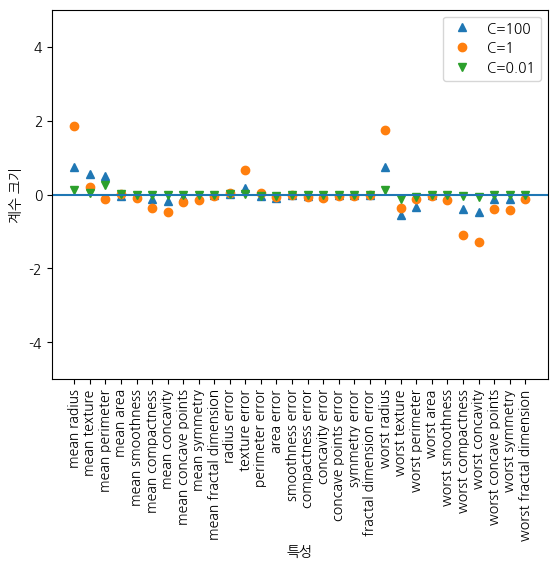

In [47]:
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg001.coef_.T, 'v', label="C=0.01")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-5, 5)
plt.xlabel("특성")
plt.ylabel("계수 크기")
plt.legend()
plt.show()

### L1 규제에 따른 성능평가

In [48]:
logreg = LogisticRegression(penalty='l1',solver='liblinear').fit(X_train,y_train)
print('훈련 데이터셋의 R2: ', logreg.score(X_train, y_train))
print('테스트 데이터셋의 R2: ', logreg.score(X_test, y_test))
print('-----------------------------------------------------------')

# 규제 강화
logreg001 = LogisticRegression(penalty='l1',solver='liblinear',C=0.01).fit(X_train,y_train)
print('훈련 데이터셋의 R2: ', logreg001.score(X_train, y_train))
print('테스트 데이터셋의 R2: ', logreg001.score(X_test, y_test))
print('-----------------------------------------------------------')

#규제 완화
logreg100 = LogisticRegression(penalty='l1',solver='liblinear',C = 100).fit(X_train,y_train)
print('훈련 데이터셋의 R2: ', logreg100.score(X_train, y_train))
print('테스트 데이터셋의 R2: ', logreg100.score(X_test, y_test))
print('-----------------------------------------------------------')

훈련 데이터셋의 R2:  0.960093896713615
테스트 데이터셋의 R2:  0.9440559440559441
-----------------------------------------------------------
훈련 데이터셋의 R2:  0.9154929577464789
테스트 데이터셋의 R2:  0.916083916083916
-----------------------------------------------------------
훈련 데이터셋의 R2:  0.9859154929577465
테스트 데이터셋의 R2:  0.958041958041958
-----------------------------------------------------------


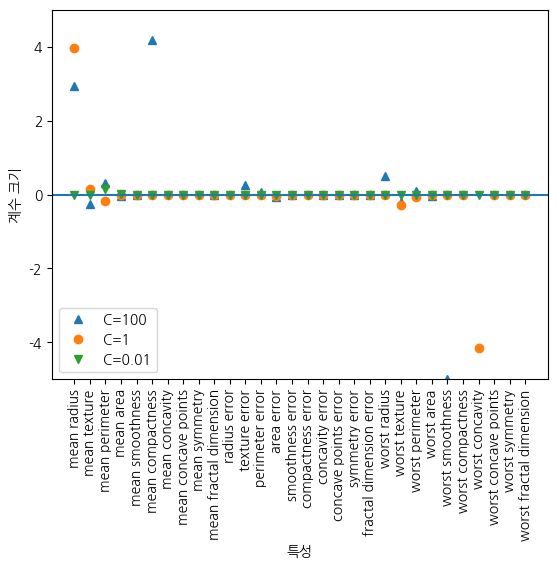

In [49]:
# L1 규제에 대한 feature들의 가중치를 확인

plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg001.coef_.T, 'v', label="C=0.01")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-5, 5)
plt.xlabel("특성")
plt.ylabel("계수 크기")
plt.legend()
plt.show()

### L2 규제에 따른 성능평가

In [50]:
logreg = LogisticRegression(penalty='l2',solver='liblinear').fit(X_train,y_train)
print('훈련 데이터셋의 R2: ', logreg.score(X_train, y_train))
print('테스트 데이터셋의 R2: ', logreg.score(X_test, y_test))
print('-----------------------------------------------------------')

# 규제 강화
logreg001 = LogisticRegression(penalty='l2',solver='liblinear',C=0.01).fit(X_train,y_train)
print('훈련 데이터셋의 R2: ', logreg001.score(X_train, y_train))
print('테스트 데이터셋의 R2: ', logreg001.score(X_test, y_test))
print('-----------------------------------------------------------')

#규제 완화
logreg100 = LogisticRegression(penalty='l2',solver='liblinear',C = 100).fit(X_train,y_train)
print('훈련 데이터셋의 R2: ', logreg100.score(X_train, y_train))
print('테스트 데이터셋의 R2: ', logreg100.score(X_test, y_test))
print('-----------------------------------------------------------')

훈련 데이터셋의 R2:  0.9577464788732394
테스트 데이터셋의 R2:  0.9440559440559441
-----------------------------------------------------------
훈련 데이터셋의 R2:  0.9295774647887324
테스트 데이터셋의 R2:  0.9440559440559441
-----------------------------------------------------------
훈련 데이터셋의 R2:  0.9812206572769953
테스트 데이터셋의 R2:  0.9230769230769231
-----------------------------------------------------------


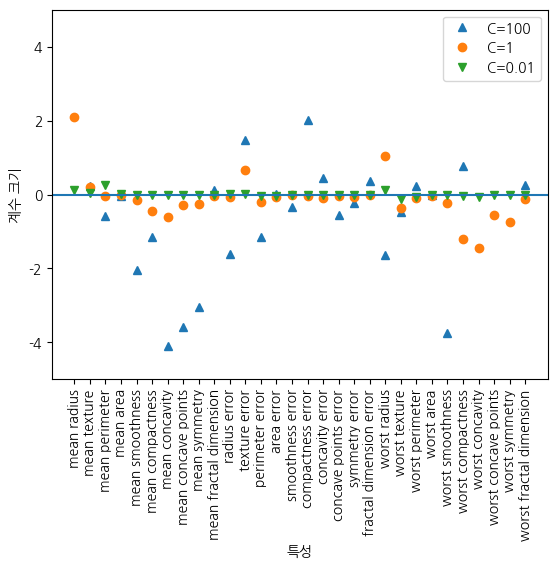

In [51]:
# L2 규제에 대한 feature들의 가중치를 확인

plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg001.coef_.T, 'v', label="C=0.01")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-5, 5)
plt.xlabel("특성")
plt.ylabel("계수 크기")
plt.legend()
plt.show()